## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats 
 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

from sklearn import preprocessing

In [2]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.3f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

In [3]:
# read the data frame
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


In [4]:
# check the shape of the data
df.shape

(5000, 14)

In [5]:
# check the data type
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
# check the data types using the df.info(). The results shows all results are numerica but values like 
# online, CD.Account, Family and Educational can be categorical.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# check null values - result shows there is no missing value as isnull() checks return False.
df.isnull().values.any()

False

<AxesSubplot:>

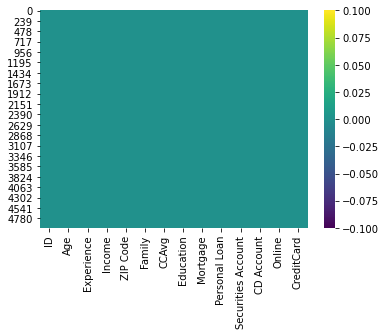

In [8]:
# possible Heatmap for the missing values can be presented as 

sns.heatmap(df.isna(), cbar=True,cmap='viridis')

In [9]:
# alternatively, we can loop and check all of the columns if there is a null data in the file or not

df.apply(lambda x: sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# check the average statistics of the data by using describe() function.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.000","2,500.500","1,443.520",1.000,"1,250.750","2,500.500","3,750.250","5,000.000"
Age,"5,000.000",45.338,11.463,23.000,35.000,45.000,55.000,67.000
Experience,"5,000.000",20.105,11.468,-3.000,10.000,20.000,30.000,43.000
Income,"5,000.000",73.774,46.034,8.000,39.000,64.000,98.000,224.000
ZIP Code,"5,000.000","93,152.503","2,121.852","9,307.000","91,911.000","93,437.000","94,608.000","96,651.000"
Family,"5,000.000",2.396,1.148,1.000,1.000,2.000,3.000,4.000
CCAvg,"5,000.000",1.938,1.748,0.000,0.700,1.500,2.500,10.000
Education,"5,000.000",1.881,0.840,1.000,1.000,2.000,3.000,3.000
Mortgage,"5,000.000",56.499,101.714,0.000,0.000,0.000,101.000,635.000
Personal Loan,"5,000.000",0.096,0.295,0.000,0.000,0.000,0.000,1.000


## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

In [11]:
# Number of unique in each column? This can be checked with df.nunique() or with a lambda expression that checks unique()
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
# Number of people with zero mortgage?
df[df['Mortgage'] ==0]['Mortgage'].count()

3462

In [13]:
#Number of people with zero credit card spending per month?
df[df['CCAvg'] ==0]['CCAvg'].count()

106

## Value counts of all categorical columns. We have to identify the categorical columns.

Categorical variables can be divided into qualitative and quantitative.
When it comes to quantitative, we can see Interval, Binary, and Ratio; when it comes to qualitative, we can divide categorical variables into nominal(where no intrinsic rank is required) and Ordinal(where the intrinsic rank is vital). 

Hence, ID, ZIP Code are nominal categorical variables.

Family and Education are ordinal categories.

Age, Experience, Income, CCAvg, and Mortage are having average values, which makes them interval variables. CD Account, Security Account, Online, Credit Card, and Personal Loans are binary categories.


In [14]:
# THE COUNT IS top level function that loops the entire column value.
for col in df.columns:
     #print(col)
     print(df[col].value_counts(normalize=True))

2047   0.000
2608   0.000
4647   0.000
2600   0.000
553    0.000
        ... 
3263   0.000
1218   0.000
3267   0.000
1222   0.000
2049   0.000
Name: ID, Length: 5000, dtype: float64
35   0.030
43   0.030
52   0.029
58   0.029
54   0.029
50   0.028
41   0.027
30   0.027
56   0.027
34   0.027
39   0.027
59   0.026
57   0.026
51   0.026
60   0.025
45   0.025
46   0.025
42   0.025
40   0.025
31   0.025
55   0.025
62   0.025
29   0.025
61   0.024
44   0.024
32   0.024
33   0.024
48   0.024
38   0.023
49   0.023
47   0.023
53   0.022
63   0.022
36   0.021
37   0.021
28   0.021
27   0.018
65   0.016
64   0.016
26   0.016
25   0.011
24   0.006
66   0.005
23   0.002
67   0.002
Name: Age, dtype: float64
 32   0.031
 20   0.030
 9    0.029
 5    0.029
 23   0.029
 35   0.029
 25   0.028
 28   0.028
 18   0.027
 19   0.027
 26   0.027
 24   0.026
 3    0.026
 14   0.025
 16   0.025
 30   0.025
 34   0.025
 27   0.025
 17   0.025
 29   0.025
 22   0.025
 7    0.024
 8    0.024
 6    0.024
 15   0.0

# Univariate and Bivariate

In [15]:
# ID has all unique values and it is not continous colimn so it has 5000 columns, so, we can drop it

cr_df = df.drop('ID', axis=1)
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


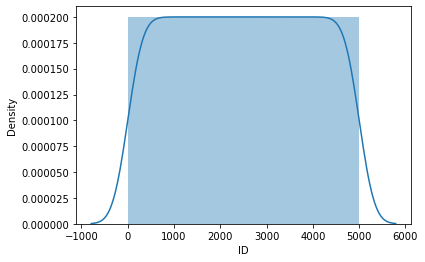

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


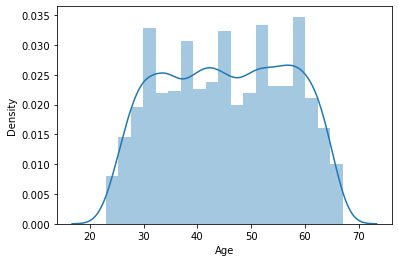

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


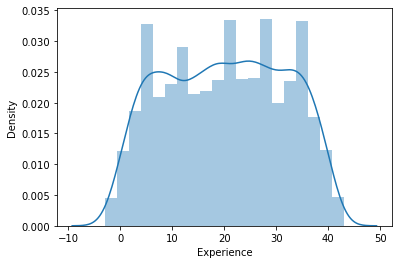

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


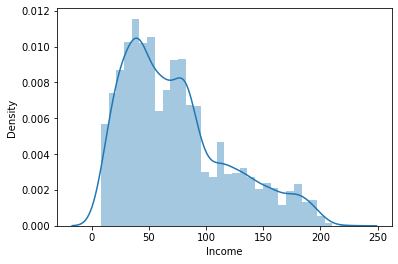

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


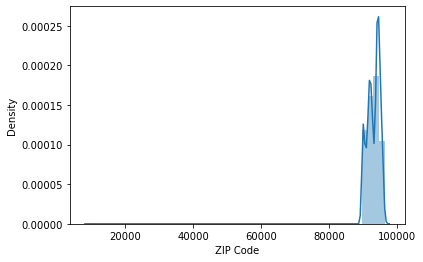

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


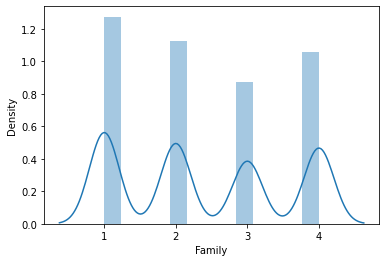

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


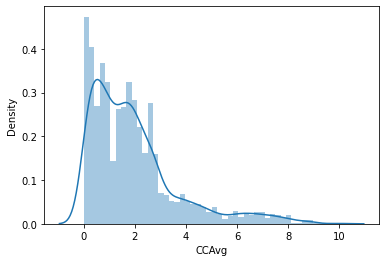

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


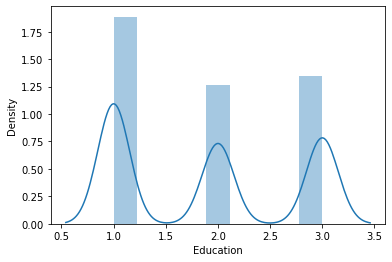

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


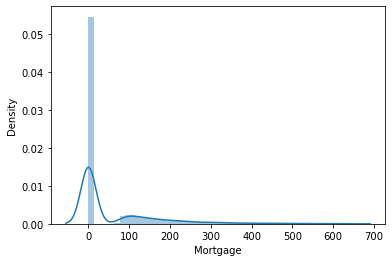

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


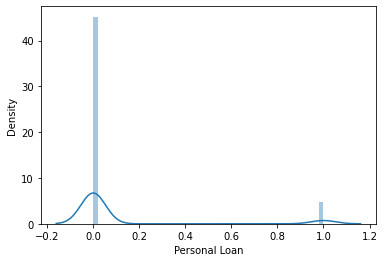

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


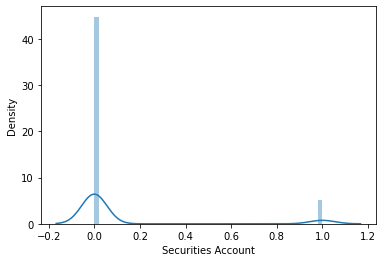

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


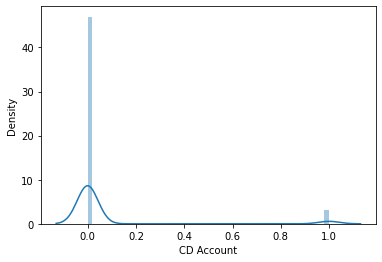

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


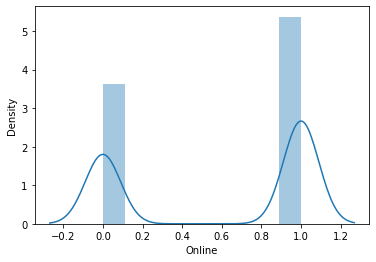

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


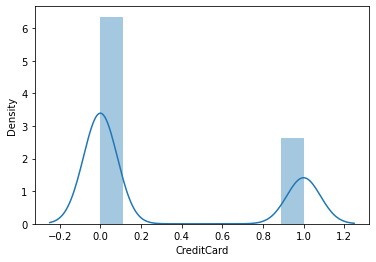

In [16]:
# univariate analysis of a distplot - All of the columns are categorical 
#in nature that we do not need to convert columns into categorical.

for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [17]:
# checking value counts of all object type columns
for i in list(cr_df.columns):   
    print(cr_df[i].value_counts(normalize=True))
    print()

35   0.030
43   0.030
52   0.029
58   0.029
54   0.029
50   0.028
41   0.027
30   0.027
56   0.027
34   0.027
39   0.027
59   0.026
57   0.026
51   0.026
60   0.025
45   0.025
46   0.025
42   0.025
40   0.025
31   0.025
55   0.025
62   0.025
29   0.025
61   0.024
44   0.024
32   0.024
33   0.024
48   0.024
38   0.023
49   0.023
47   0.023
53   0.022
63   0.022
36   0.021
37   0.021
28   0.021
27   0.018
65   0.016
64   0.016
26   0.016
25   0.011
24   0.006
66   0.005
23   0.002
67   0.002
Name: Age, dtype: float64

 32   0.031
 20   0.030
 9    0.029
 5    0.029
 23   0.029
 35   0.029
 25   0.028
 28   0.028
 18   0.027
 19   0.027
 26   0.027
 24   0.026
 3    0.026
 14   0.025
 16   0.025
 30   0.025
 34   0.025
 27   0.025
 17   0.025
 29   0.025
 22   0.025
 7    0.024
 8    0.024
 6    0.024
 15   0.024
 10   0.024
 33   0.023
 13   0.023
 11   0.023
 37   0.023
 36   0.023
 21   0.023
 4    0.023
 31   0.021
 12   0.020
 38   0.018
 39   0.017
 2    0.017
 1    0.015
 0    0.01

In [18]:
# Total records of negative experience
df[df['Experience'] < 0]['Experience'].count()

52

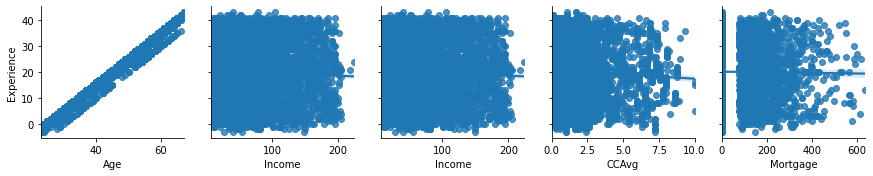

In [19]:
# Checking the association of Experience with other quantitive variables 
qvariables = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
assGrid = sns.PairGrid(df, y_vars = 'Experience', x_vars = qvariables)
assGrid.map(sns.regplot)


In [20]:
# checking the target distribution of Perosnal Loan value counts. The result shows the people who
# took personal loan are greater than those who took. 4520 people wont took a loan but 480 took a loan.

personal_loan_count = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
personal_loan_count.columns =["Labels","Personal Loan"]
personal_loan_count

,Labels,Personal Loan
0,0,4520
1,1,480


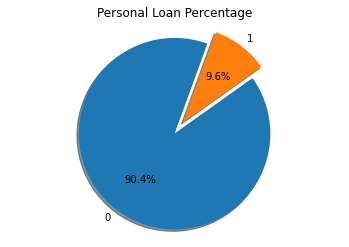

In [21]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(personal_loan_count["Personal Loan"], 
        explode=explode,
        labels=personal_loan_count["Labels"], 
        autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

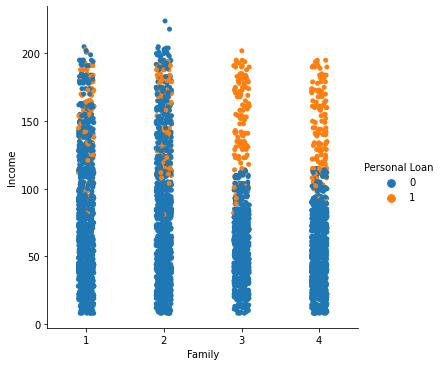

In [22]:
# the association between family, income and personal loan are 

sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df)

<AxesSubplot:xlabel='Education', ylabel='Income'>

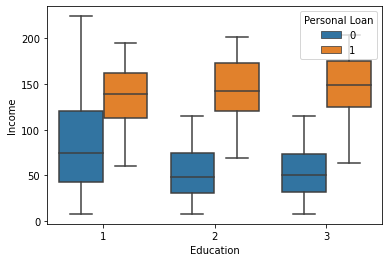

In [23]:
# the association between Education, Income, and Personal Loan
sns.boxplot(x='Education', y='Income', hue='Personal Loan',data=df)

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

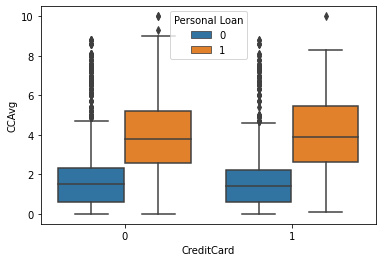

In [24]:
# the association of credit card, CCAvg and Perosonal Loan
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution')

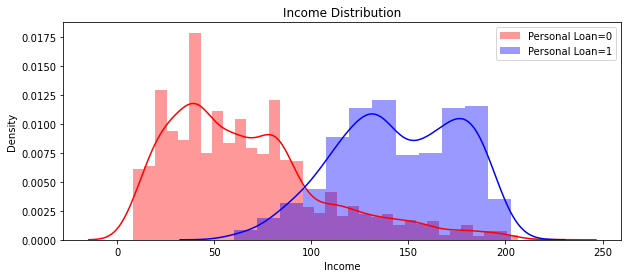

In [25]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'red',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'blue',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

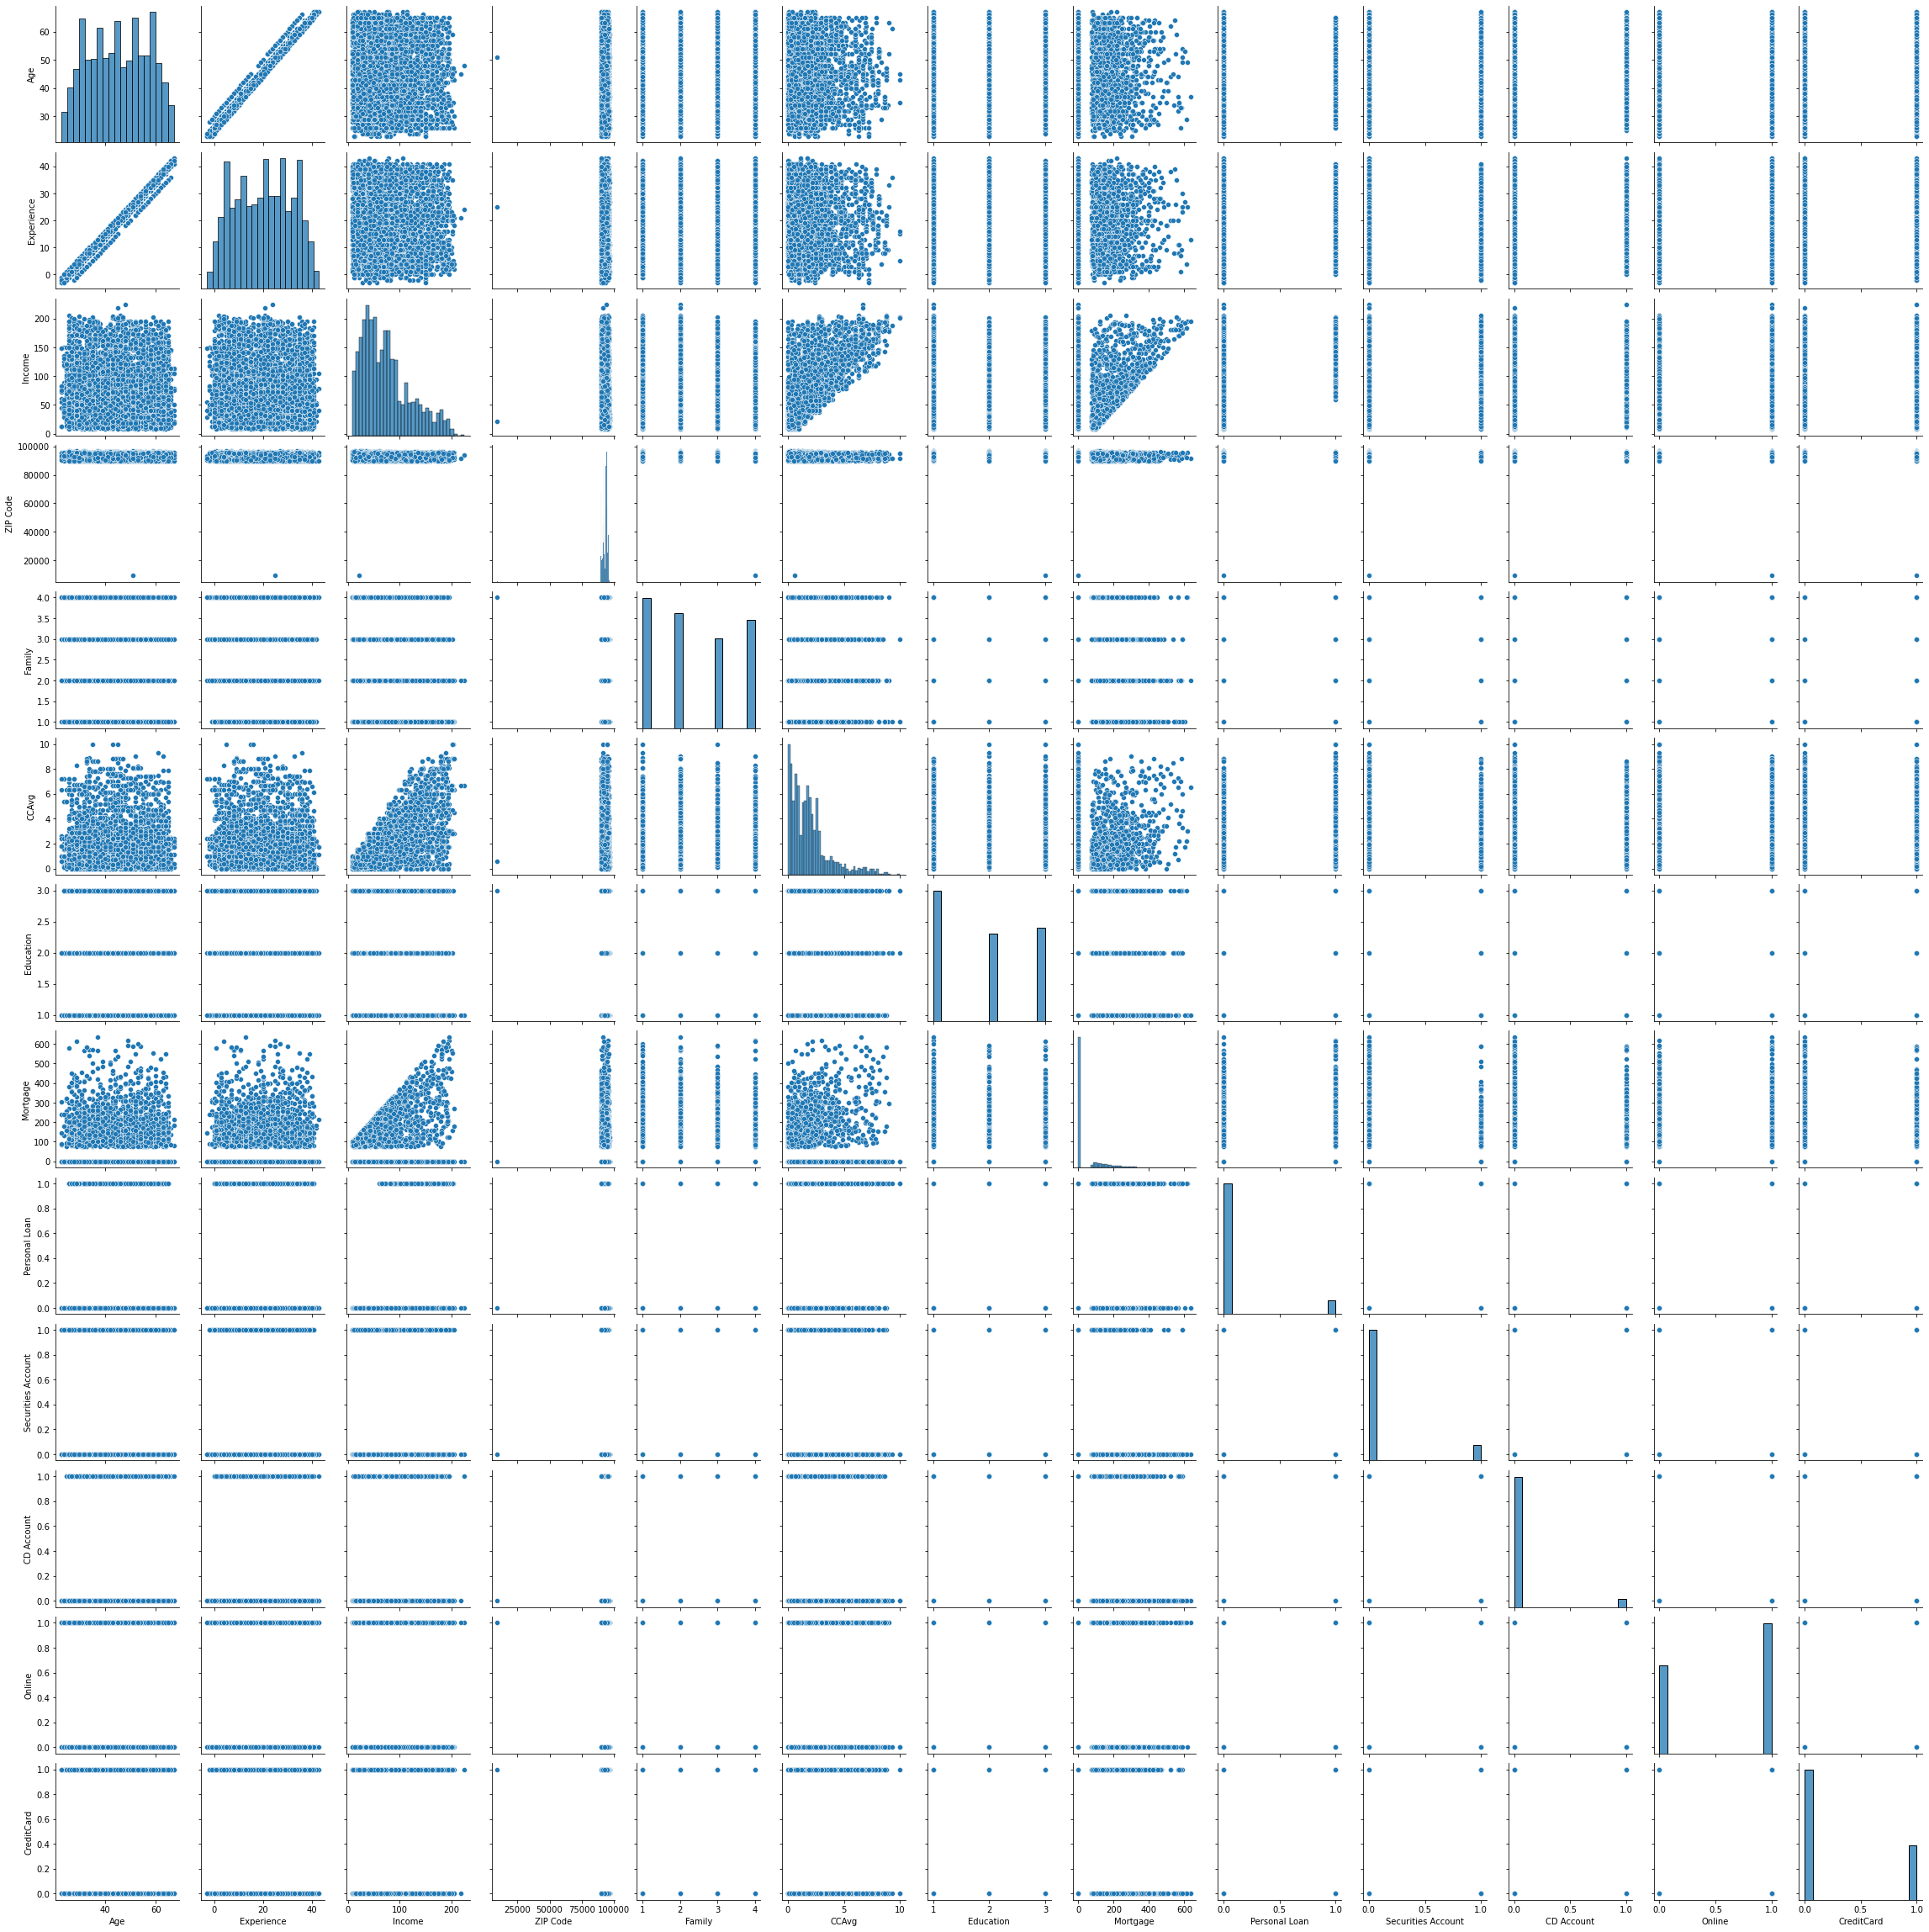

In [26]:
sns.pairplot(df.iloc[:,1:])

<AxesSubplot:title={'center':'Correlation of variables'}>

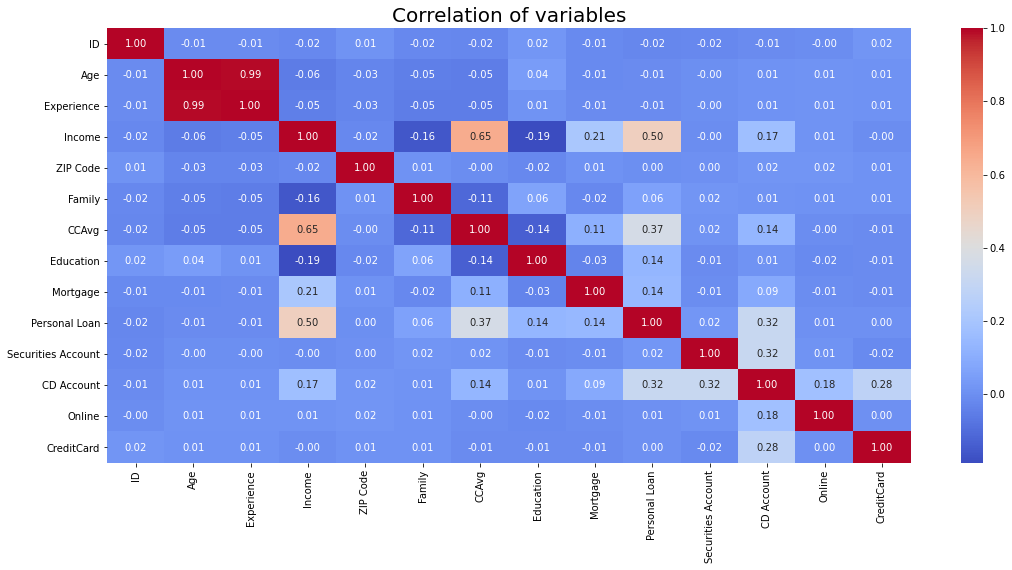

In [27]:
# Heat map for the entire corolation
plt.figure(figsize = (18,8))
plt.title('Correlation of variables', y=1.00, size=20)
sns.heatmap(df.corr(), cmap='coolwarm',annot=True, fmt='.2f')

## Get data model ready

In [28]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


In [29]:
# dropping the ID and ZipCode columns as they are not unique.
df = df.drop(['ID','ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.600,1,0,0,1,0,0,0
1,45,19,34,3,1.500,1,0,0,1,0,0,0
2,39,15,11,1,1.000,1,0,0,0,0,0,0
3,35,9,100,1,2.700,2,0,0,0,0,0,0
4,35,8,45,4,1.000,2,0,0,0,0,0,1


## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)


Assumptions: 
1. Separate the columns with and with out Experiance.
2. Identify the target variable from independet variables from experiance and with out experiance.
3. Split the data into training and test sets.

In [30]:
#1. Separate the columns with and with out Experiance.
personaloan_with_experience = df
personaloan_without_experience = df.drop(['Experience'], axis=1)

In [31]:
2.# Find the values of target variables- in this case the independent variable is Personal Loan
X_Ex = personaloan_with_experience.drop('Personal Loan', axis=1)
Y_Ex = personaloan_with_experience[['Personal Loan']]

In [32]:
2.# Find the values of target variables- with out experiance AS WEX
X_WEx = personaloan_without_experience.drop('Personal Loan', axis=1)
Y_WEx = personaloan_without_experience[['Personal Loan']]

In [33]:
#3. Splitting the data into training and test with the required 70:30 ratio.
# training the experiance data as Ex 
X_Ex_train, X_Ex_test, y_Ex_train, y_Ex_test = train_test_split(X_Ex, Y_Ex, test_size=0.30, random_state=1)

In [34]:
# training the experiance data as X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_WEx, Y_WEx, test_size=0.30, random_state=1)

# 4. Logistic Regression

In [79]:
# the training set for the data with experiance variable
#1. First calling the fit() function with a LogisticRegression()
logreg_ex_model = LogisticRegression(random_state=4294967295,fit_intercept=False)

logreg_ex_model.fit(X_Ex_train, y_Ex_train)


C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, random_state=4294967295)

In [80]:
# Predicting for test set
logreg_ex_y_predicted = logreg_ex_model.predict(X_Ex_test)
logreg_ex_score = logreg_ex_model.score(X_Ex_test, y_Ex_test)
logreg_ex_accuracy = accuracy_score(y_Ex_test, logreg_ex_y_predicted)
logestic_confusion_matrix_expr = metrics.confusion_matrix(y_Ex_test, logreg_ex_y_predicted)

In [63]:
#X_train, X_test, y_train, y_test
logreg_model = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg_model.fit(X_train, y_train)

# Predicting for test set
logreg_y_predicted = logreg_model.predict(X_test)
logreg_score = logreg_model.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
logestic_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
# Accuracy
print('Logistic Regression Model Accuracy Score W/O Experience  : %f'  % logreg_accuracy)

print('Logistic Regression Model Accuracy Score With Experience : %f'  % logreg_ex_accuracy)

Logistic Regression Model Accuracy Score W/O Experience  : 0.902000
Logistic Regression Model Accuracy Score With Experience : 0.947333


In [84]:
# Confusion Matrix

print('nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)

nLogistic Regression Confusion Matrix W/O Experience: 
 [[1304   47]
 [ 100   49]]


In [83]:
print('Logistic Regression Confusion Matrix With Experience: \n', logestic_confusion_matrix_expr)

Logistic Regression Confusion Matrix With Experience: 
 [[1336   15]
 [  64   85]]


In [41]:
# True Positive(TP),True Negative(TN), False Positive(FP), False Negative(FN)-With out Experiance
print('\nTP = ', logestic_confusion_matrix[1][1])
print('TN  = ',   logestic_confusion_matrix[0][0])
print('TP  = ',   logestic_confusion_matrix[0][1])
print('TN  = ',   logestic_confusion_matrix[1][0])


TP =  49
TN  =  1304
TP  =  47
TN  =  100


In [42]:
# True Positive(TP),True Negative(TN), False Positive(FP), False Negative(FN)-With  Experiance

print('\nTP =',  logestic_confusion_matrix_expr[1][1])
print('TN = ',   logestic_confusion_matrix_expr[0][0])
print('TP = ',    logestic_confusion_matrix_expr[0][1])
print('TN = ',   logestic_confusion_matrix_expr[1][0])


TP = 85
TN =  1336
TP =  15
TN =  64


In [43]:
def draw_cm(actual, predicted ):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [44]:
#X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test
X_train_scaled = preprocessing.scale(X_Ex_train)
X_test_scaled = preprocessing.scale(X_Ex_test)

In [45]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_Ex_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Ex_test)
scaled_logreg_accuracy = accuracy_score(y_Ex_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_Ex_test, scaled_logreg_y_predicted)

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [53]:
print('After Scalling  Accuracy Score with Experience: %f'  % scaled_logreg_accuracy)
print('\nAfter Scalling onfusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTP    = ', scaled_logreg_confusion_matrix[1][1])
print('TN     = ',   scaled_logreg_confusion_matrix[0][0])
print('FP     = ',   scaled_logreg_confusion_matrix[0][1])
print('fn    = ',   scaled_logreg_confusion_matrix[1][0])
conf_table = scaled_logreg_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))


After Scalling  Accuracy Score with Experience: 0.948000

After Scalling onfusion Matrix With Experience: 
 [[1333   18]
 [  60   89]]

TP    =  89
TN     =  1333
FP     =  18
fn    =  60
Accuracy of accepting Loan  :  0.95
precision of accepting Loan :  0.83
recall of accepting Loan    :  0.6
F1 score of accepting Loan  :  0.7


In [54]:
#roc_auc_score

scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(X_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(X_test_scaled, y_test)
scaled_gnb_accuracy = accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)
print("Roc Auc Score  : ",metrics.roc_auc_score(y_Ex_test, scaled_logreg_y_predicted))


Roc Auc Score  :  0.7919959860704723


C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [55]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

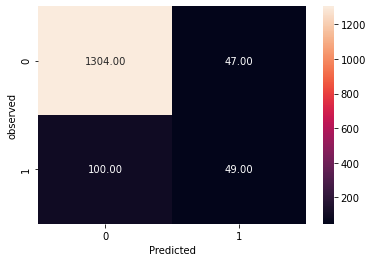

In [57]:
draw_cm(y_test, logreg_y_predicted)


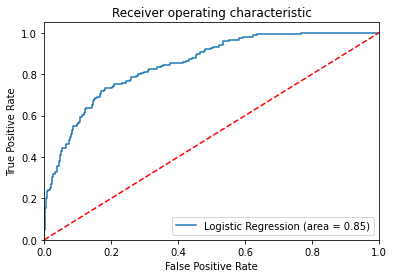

In [49]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 5. Coefficent 

In [60]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg_model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
7,CD Account,3.730
9,CreditCard,1.250
8,Online,1.220
6,Securities Account,0.640
4,Education,0.220
0,Age,0.100
3,CCAvg,0.030
1,Income,0.020
2,Family,0.000
5,Mortgage,0.000


In [66]:
# Fit logestic regression modes (statsmodel)

import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary()

Optimization terminated successfully.
         Current function value: 0.124461
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Sat, 06 Mar 2021   Pseudo R-squ.:                  0.6023
Time:                        09:07:04   Log-Likelihood:                -435.61
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.151e-277
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.7674      0.819    -16.807      0.000     -15.373     -12.162
Age                    0.0050      0.008      0.644      0.520      -0.010       0.020
Income                 0.0537      0.003     16.872      0.000       0.047       0.060
Family                 0.7299      0.093      7.865      0.000       0.548       0.912
CCAvg                  0.1718      0.049      3.538      0.000       0.077       0.267
Education              1.7213      0.139     12.382      0.000       1.449       1.994
Mortgage               0.0008      0.001      1.148      0.251      -0.001       0.002
Securities Account    -1.1962      0.371     -3.226      0.001      -1.923      -0.469
CD Account             3.8829      0.399      9.726      0.000       3.100       4.665
Online                -0.6347      0.191     -3.327      0.001      -1.009      -0.261
CreditCard            -1.1790      0.250     -4.710      0.000      -1.670      -0.688
======================================================================================
"""

In [ ]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = logreg_model.predict( sm.add_constant(X_test))

y_pred_df['predicted'] = logreg_y_predicted.predicted_prob.map(lambda x: 1 if x > 0.6 else 0)

y_pred_df[0:5]

6. Give conclusion related to the Business understanding of your model? (5 marks)

The best of accuracy of 96%.
Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is almost same at without 'Experience'.
Type I (False Possitive) and Type II(False Negative) errors is same.
Hence we can imporove the accuracy by scalling the attributes.
We can consider any dafaframe 'With Experience' or 'Without Experience' for further iteration.